# Aparté sur le voyageur de commerce

Le voyageur de commerce ou Travelling Salesman Problem en anglais est le problème NP-complet emblématique : il n'existe pas d'algorithme capable de trouver la solution optimale en temps polynômial. La seule option est de parcourir toutes les configurations pour trouver la meilleure. Ce notebook ne fait qu'aborder le problème.

In [1]:
%matplotlib inline

## Tirer des points aléatoirement et les afficher

In [2]:
import numpy

points = numpy.random.random((6, 2))
points

array([[0.20256988, 0.27603738],
       [0.77763596, 0.50108287],
       [0.07482647, 0.60880805],
       [0.56075455, 0.9637854 ],
       [0.79735982, 0.32773718],
       [0.65017942, 0.96827692]])

## Distance d'un chemin

In [3]:
def distance_chemin(points, chemin):
    dist = 0
    for i in range(1, len(points)):
        dx, dy = points[chemin[i], :] - points[chemin[i - 1], :]
        dist += (dx**2 + dy**2) ** 0.5
    dx, dy = points[chemin[0], :] - points[chemin[-1], :]
    dist += (dx**2 + dy**2) ** 0.5
    return dist


distance_chemin(points, list(range(points.shape[0])))

4.090536785820115

## Visualisation

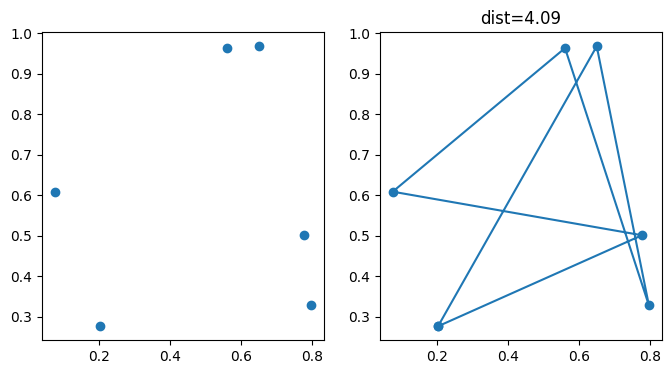

In [4]:
import matplotlib.pyplot as plt


def plot_points(points, chemin):
    fig, ax = plt.subplots(1, 2, figsize=(8, 4))

    loop = list(chemin) + [chemin[0]]
    p = points[loop]

    ax[0].plot(points[:, 0], points[:, 1], "o")
    ax[1].plot(p[:, 0], p[:, 1], "o-")
    ax[1].set_title("dist=%1.2f" % distance_chemin(points, chemin))
    return ax


plot_points(points, list(range(points.shape[0])));

## Parcourir toutes les permutations

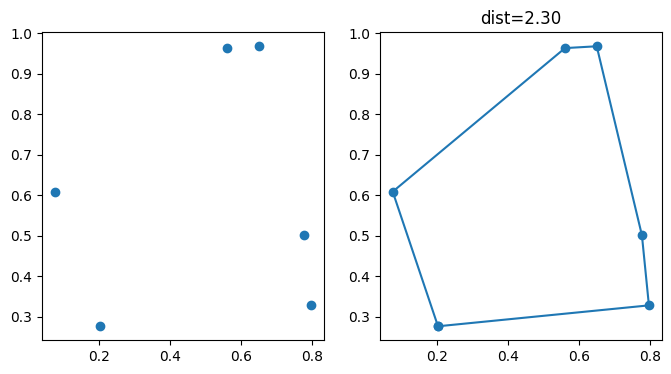

In [5]:
from itertools import permutations


def optimisation(points, chemin):
    dist = distance_chemin(points, chemin)
    best = chemin
    for perm in permutations(chemin):
        d = distance_chemin(points, perm)
        if d < dist:
            dist = d
            best = perm
    return best


res = optimisation(points, list(range(points.shape[0])))
plot_points(points, res);

## Module tqdm

Utile seulement dans un notebook, très utile pour les impatients.

(0, 1, 3, 5, 2, 4): : 0it [00:00, ?it/s]

(5, 4, 3, 2, 1, 0): : 720it [00:03, 227.89it/s]


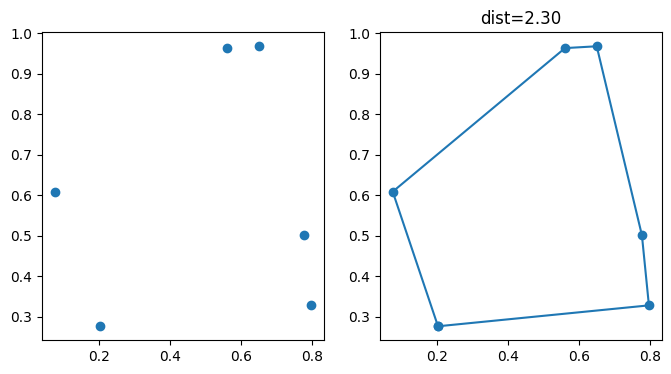

In [6]:
from tqdm import tqdm


def optimisation(points, chemin):
    dist = distance_chemin(points, chemin)
    best = chemin
    loop = tqdm(permutations(chemin))
    for perm in loop:
        loop.set_description(str(perm))
        d = distance_chemin(points, perm)
        if d < dist:
            dist = d
            best = perm
    return best


res = optimisation(points, list(range(points.shape[0])))
plot_points(points, res);

## Retournement

Les permutations ça prend du temps même avec les machines d'aujourd'hui.

In [7]:
def optimisation_retournement(points, chemin):
    dist = distance_chemin(points, chemin)
    best = chemin
    for i in range(1, len(chemin)):
        for j in range(i + 1, len(chemin)):
            chemin[i:j] = chemin[j - 1 : i - 1 : -1]
            d = distance_chemin(points, chemin)
            if d < dist:
                dist = d
            else:
                chemin[i:j] = chemin[j - 1 : i - 1 : -1]
    return chemin


res = optimisation_retournement(points, list(range(points.shape[0])))
plot_points(points, res);